## NFL Combine and its impact in NFL Draft
 We always have the big question: What does it take to be in the NFL? We really don't know since there have been home runs in late picks like Tom Brady or even Antonio Brown. Or busts like Ryan Leaf or Jamarcus Russell. 

 NFL Draft is the oportunity for teams to bring in fresh new talent to improve or get their new franchise player. However, is there any meaning in the combine? 
 
 The NFL Combine is where college football players perform physical and mental tests in front of National Football League coaches, general managers, and scouts.

 Lets's take a look at last year's combine to determine what is the most relevant variable. 

In [2]:
# Import all the important libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import pandas as pd

# Import the web scraping libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs



In [9]:
#Create the variables for PFR

years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
d={}
year=2010
while year != 2022:
  url = f"https://www.pro-football-reference.com/draft/{year}-combine.htm"
  html = urlopen(url)
  combine_data=bs(html)
  column_headers = combine_data.findAll('tr')[0]
  column_headers = [i.getText() for i in column_headers.findAll(['th','td'])]
  rows = combine_data.findAll('tr')[1:]
  comb_data=[]
  for i in range(len(rows)):
    comb_data.append([col.getText() for col in rows[i].findAll(['td','th'])])
  #print(comb_data)
  data = pd.DataFrame(comb_data, columns=column_headers[0:])
  df = data[(data != data.columns).all(axis=1)]
  d["combine{0}".format(year)]=df
  year=year+1
  


In [10]:
# Merge everything into a beautiful DataFrame
df=pd.concat(d.values(),ignore_index=True)
df.head()



,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,Seyi Ajirotutu,WR,Fresno State,College Stats,6-3,204,4.60,36.0,14,115,7.22,4.39,
1,Rahim Alem,DE,LSU,College Stats,6-3,251,4.75,30.5,,106,7.54,4.80,
2,Charles Alexander,DT,LSU,College Stats,6-4,300,5.40,,,,,,
3,Danario Alexander,WR,Missouri,College Stats,6-5,215,4.62,,,,,,
4,Nate Allen,S,South Florida,College Stats,6-0,207,4.50,,16,,,,Philadelphia Eagles / 2nd / 37th pick / 2010


In [11]:
#First of all lets clean the data and get more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4098 entries, 0 to 4097
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Player               4098 non-null   object
 1   Pos                  4098 non-null   object
 2   School               4098 non-null   object
 3   College              4098 non-null   object
 4   Ht                   4098 non-null   object
 5   Wt                   4098 non-null   object
 6   40yd                 4098 non-null   object
 7   Vertical             4098 non-null   object
 8   Bench                4098 non-null   object
 9   Broad Jump           4098 non-null   object
 10  3Cone                4098 non-null   object
 11  Shuttle              4098 non-null   object
 12  Drafted (tm/rnd/yr)  4098 non-null   object
dtypes: object(13)
memory usage: 416.3+ KB


In [12]:
#Some Houskeeping
df=df.apply(lambda x:x.str.replace('-','.'))
df=df.apply(pd.to_numeric, errors='ignore')
df

,Player,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,Seyi Ajirotutu,WR,Fresno State,College Stats,6.30,204.0,4.60,36.0,14.0,115.0,7.22,4.39,
1,Rahim Alem,DE,LSU,College Stats,6.30,251.0,4.75,30.5,NaN,106.0,7.54,4.80,
2,Charles Alexander,DT,LSU,College Stats,6.40,300.0,5.40,NaN,NaN,NaN,NaN,NaN,
3,Danario Alexander,WR,Missouri,College Stats,6.50,215.0,4.62,NaN,NaN,NaN,NaN,NaN,
4,Nate Allen,S,South Florida,College Stats,6.00,207.0,4.50,NaN,16.0,NaN,NaN,NaN,Philadelphia Eagles / 2nd / 37th pick / 2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093,Brock Wright,TE,Notre Dame,College Stats,6.40,257.0,4.62,31.5,26.0,118.0,7.27,4.25,
4094,Nahshon Wright,DB,Oregon St.,College Stats,6.40,183.0,4.46,31.0,6.0,126.0,7.24,4.57,Dallas Cowboys / 3rd / 99th pick / 2021
4095,Kenny Yeboah,TE,Mississippi,College Stats,6.30,250.0,NaN,34.0,NaN,116.0,NaN,NaN,
4096,Devonte Young,DB,Iowa,College Stats,5.11,195.0,4.70,32.0,NaN,118.0,7.41,4.38,


## Frist Approach
We want to know the pre draft relevance for NFL prospects. The main scope of this algorithm is to weight on the relevance of the physical traits and times registered for the Combine. We will also bring some context into the algorithm. Like for example, how much does it weight in a PAC-12 prospect from a Big10 prospect. 

The first algorithm will only determine if the prospect was drafted or not. Since it is a binary approach we will try a Logistic Regression to see the importance of the variables. 

On the next approaches we will try out the rounds in which the prospect is drafted. 

### Exploratory Data Analysis

In [13]:
df.describe()

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
count,4069.000000,4074.000000,3749.000000,3278.000000,2992.000000,3226.000000,2621.000000,2710.000000
mean,6.075173,242.048601,4.768320,32.892251,20.177473,115.473032,7.246127,4.409557
std,0.455392,45.102759,0.299886,4.185943,6.504756,9.287687,0.403934,0.262467
min,5.100000,144.000000,4.220000,17.500000,2.000000,82.000000,6.280000,3.810000
25%,6.000000,205.000000,4.530000,30.000000,15.000000,110.000000,6.950000,4.210000
50%,6.200000,232.000000,4.680000,33.000000,20.000000,117.000000,7.150000,4.370000
75%,6.400000,277.750000,4.960000,36.000000,24.000000,122.000000,7.490000,4.570000
max,6.900000,369.000000,6.000000,46.500000,49.000000,147.000000,9.040000,5.560000


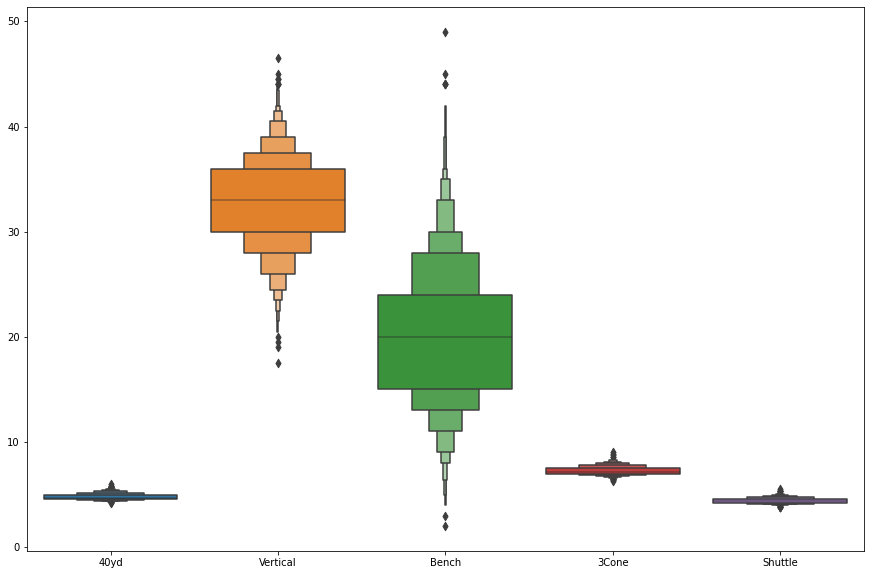

In [8]:
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.boxenplot(data=df[['40yd','Vertical','Bench','3Cone','Shuttle']])
plt.show()

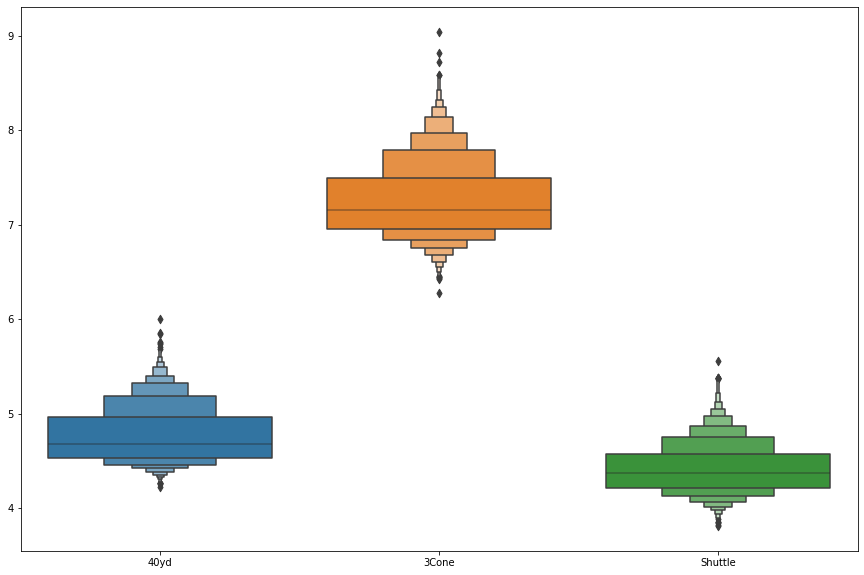

In [14]:
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.boxenplot(data=df[['40yd','3Cone','Shuttle']])
plt.show()

## EDA Results
- We don't have clear outliers in order to remove them
- The records on the measurments are not a big outlier so we can leave them

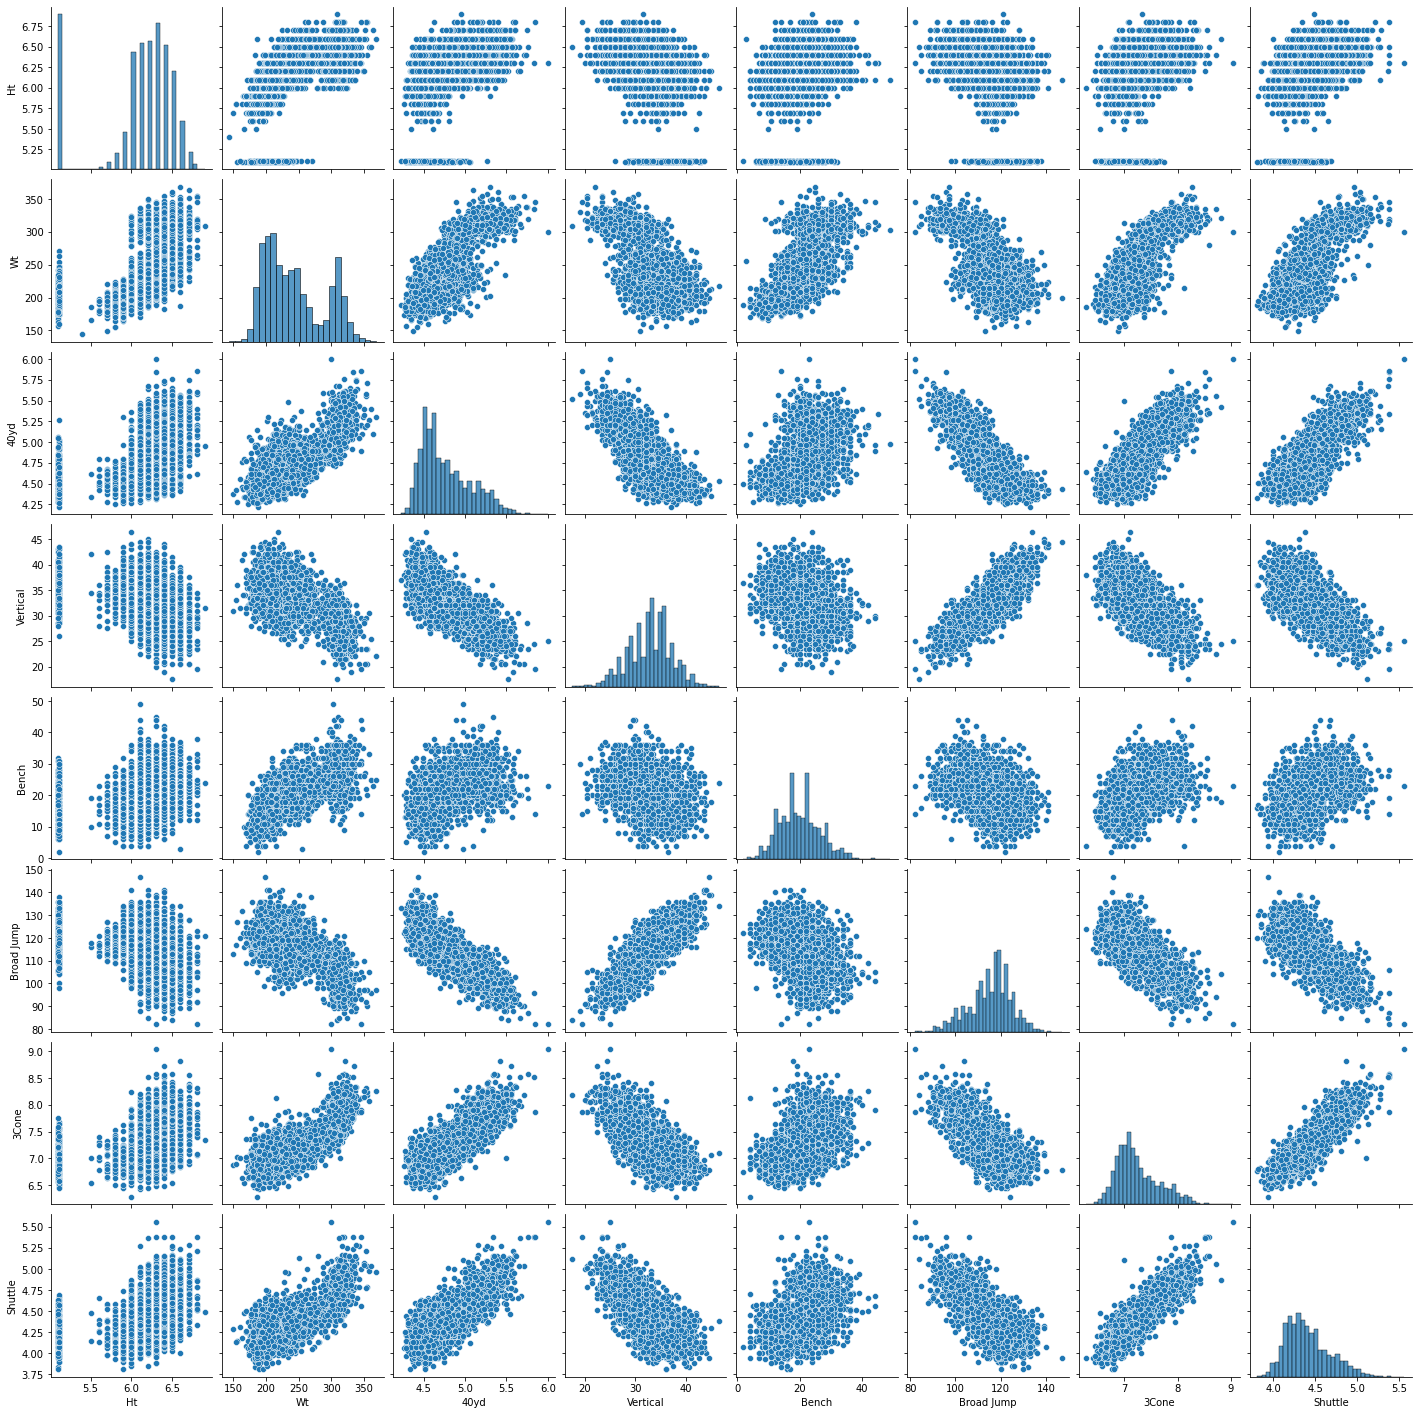

In [10]:
sns.pairplot(data=df)

In [15]:
#Lets take a look at how many players we have at each position (To see balanced classes)
df[['Pos']].value_counts()

Pos 
WR      580
CB      416
RB      364
S       283
OT      259
DT      244
DE      240
TE      225
OLB     217
QB      208
OG      166
OL      141
ILB     134
LB      125
DL      120
C        80
P        71
DB       61
K        56
EDGE     47
FB       41
LS       20
dtype: int64

## Positions
Ok, so we have to deal with the multiple classes of positions that the players declare for. Even though, there are similar positions: NT could be placed as DT, T could be placed as OT, OLB, ILB, and LB can be merged into LB only. We need to reduce the amount of classes in order to get more accuracy. Some scouts would be mad at me for doing this. 

In [16]:
#Dictionary for class reductions
c={"OLB":"LB","ILB":"LB","DB":"S","NT":"DT","T":"OT","PK":"K","EDGE":"DE"}
df['Pos']=df.Pos.replace(c)
df['Pos'].value_counts()

WR    580
LB    476
CB    416
RB    364
S     344
DE    287
OT    259
DT    244
TE    225
QB    208
OG    166
OL    141
DL    120
C      80
P      71
K      56
FB     41
LS     20
Name: Pos, dtype: int64

In [17]:
import requests
wikiurl="https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_programs"
wiki_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [18]:
soup = bs(response.text, 'html.parser')
coltable=soup.find('table',{'class':"wikitable"})

In [19]:
cfb=pd.read_html(str(coltable))
cfb=pd.DataFrame(cfb[0])
cfb.head()

,Team,Nickname,City,State[2],Enrollment,Currentconference,Formerconferences,Firstplayed,JoinedFBS
0,Air Force,Falcons,USAF Academy/Colorado Springs[n 1],Colorado,4181,Mountain West,WAC,1955,NaN
1,Akron,Zips,Akron,Ohio,14516,MAC,"OAC, MCC, OVC",1891,1987
2,Alabama,Crimson Tide,Tuscaloosa,Alabama,38316,SEC,"SIAA, SoCon",1892,NaN
3,Appalachian State,Mountaineers,Boone,North Carolina,20641,Sun Belt,"NSC, SoCon",1928,2014[n 2]
4,Arizona,Wildcats,Tucson,Arizona,49471,Pac-12,"BIAA, WAC",1899,NaN


In [20]:
df=pd.merge(df.drop('College',axis=1),cfb[['Team','Currentconference']],how='left',left_on='School',right_on='Team')

In [21]:
df.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Team,Currentconference
0,Seyi Ajirotutu,WR,Fresno State,6.3,204.0,4.60,36.0,14.0,115.0,7.22,4.39,,Fresno State,Mountain West
1,Rahim Alem,DE,LSU,6.3,251.0,4.75,30.5,NaN,106.0,7.54,4.80,,LSU,SEC
2,Charles Alexander,DT,LSU,6.4,300.0,5.40,NaN,NaN,NaN,NaN,NaN,,LSU,SEC
3,Danario Alexander,WR,Missouri,6.5,215.0,4.62,NaN,NaN,NaN,NaN,NaN,,Missouri,SEC
4,Nate Allen,S,South Florida,6.0,207.0,4.50,NaN,16.0,NaN,NaN,NaN,Philadelphia Eagles / 2nd / 37th pick / 2010,South Florida,American


In [22]:
df[['Tm','rnd','pc','yr']]=df['Drafted (tm/rnd/yr)'].str.split('/',expand=True)
df=df.drop(['Drafted (tm/rnd/yr)','Team','Player'],axis=1)

In [23]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df=df.drop('pc',axis=1)
df.head()


,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Currentconference,Tm,rnd,yr
0,WR,Fresno State,6.3,204.0,4.60,36.0,14.0,115.0,7.22,4.39,Mountain West,,None,None
1,DE,LSU,6.3,251.0,4.75,30.5,NaN,106.0,7.54,4.80,SEC,,None,None
2,DT,LSU,6.4,300.0,5.40,NaN,NaN,NaN,NaN,NaN,SEC,,None,None
3,WR,Missouri,6.5,215.0,4.62,NaN,NaN,NaN,NaN,NaN,SEC,,None,None
4,S,South Florida,6.0,207.0,4.50,NaN,16.0,NaN,NaN,NaN,American,Philadelphia Eagles,2nd,2010


In [24]:
categ=['Pos','Currentconference','Tm','rnd','School']
df[categ]=df[categ].apply(le.fit_transform)
df1=df
df1=df1.apply(le.fit_transform)
df1.head()

,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Currentconference,Tm,rnd,yr
0,17,77,11,46,35,36,12,31,80,53,10,0,7,12
1,2,110,11,93,50,24,44,22,112,94,14,0,7,12
2,4,110,12,142,115,56,44,58,204,139,14,0,7,12
3,17,143,13,57,37,56,44,58,204,139,14,0,7,12
4,15,217,8,49,25,56,14,58,204,139,1,27,1,0


In [25]:
df['yr']=df['yr'].replace({np.nan:0})
df['yr']=df['yr'].astype(str).astype(float)
df['drafted']=np.where(df['yr']!=0,1,0)

In [31]:
df.head()
df=df.fillna(0)

In [32]:
df.drafted.value_counts(normalize=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4098 entries, 0 to 4097
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pos                4098 non-null   int64  
 1   School             4098 non-null   int64  
 2   Ht                 4098 non-null   float64
 3   Wt                 4098 non-null   float64
 4   40yd               4098 non-null   float64
 5   Vertical           4098 non-null   float64
 6   Bench              4098 non-null   float64
 7   Broad Jump         4098 non-null   float64
 8   3Cone              4098 non-null   float64
 9   Shuttle            4098 non-null   float64
 10  Currentconference  4098 non-null   int64  
 11  Tm                 4098 non-null   int64  
 12  rnd                4098 non-null   int64  
 13  yr                 4098 non-null   int64  
 14  drafted            4098 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 512.2 KB


## Stat Model 
- We will try several things: we will try a Logistic Regression given the Target and removing non relevant variables like the specs of pick like rd, tm, and yr, then we will calculate the metrics to see if the Logistic Regression is effective and then calculate the P-Values with Statsmodels

### Logistic Regression

In [33]:
X=df.drop(['Tm','rnd','yr','drafted'],axis=1)
y=df[['drafted']]

In [34]:
!pip install imblearn
from imblearn.over_sampling import SMOTE 
oversample=SMOTE()
X,y=oversample.fit_resample(X,y)

In [35]:
y.value_counts()

drafted
0          2596
1          2596
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
sc=StandardScaler()
logreg=LogisticRegression()#class_weight={1:0.621,0:0.3781}, 
steps=[('scaling',sc),('logistic_regression',logreg)]
steps2=[('scaling',sc),('logistic_regression',logreg)]
pipeline=Pipeline(steps)
LR=pipeline.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
y_pred=LR.predict(X_test)

In [88]:
LR.score(X_test,y_test)

0.5468549422336328

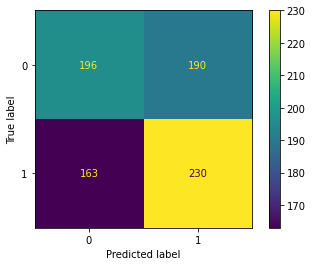

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.55      0.51      0.53       386
           1       0.55      0.59      0.57       393

    accuracy                           0.55       779
   macro avg       0.55      0.55      0.55       779
weighted avg       0.55      0.55      0.55       779



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


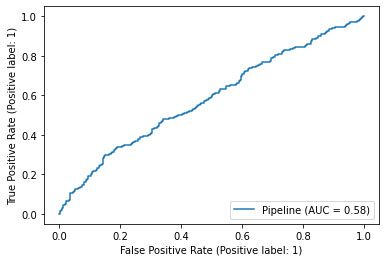

In [91]:
from sklearn import metrics
metrics.plot_roc_curve(LR, X_test, y_test) 

plt.show()

In [92]:
import statsmodels.api as sm
log_reg=sm.Logit(y_train,X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.677270
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                drafted   No. Observations:                 4413
Model:                          Logit   Df Residuals:                     4402
Method:                           MLE   Df Model:                           10
Date:                Tue, 11 Apr 2023   Pseudo R-squ.:                 0.02290
Time:                        19:38:27   Log-Likelihood:                -2988.8
converged:                       True   LL-Null:                       -3058.9
Covariance Type:            nonrobust   LLR p-value:                 3.984e-25
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pos                  -0.0222      0.006     -3.968      0.000      -0.033      -0.011
School  

### Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
sc=StandardScaler()
rfc=RandomForestClassifier(n_estimators=1200,random_state=0)#class_weight={0:0.621,1:0.3781}, 
steps=[('scaling',sc),('random_forest',rfc)]
p2=Pipeline(steps)
p2.fit(X_train,y_train.values.ravel())


Pipeline(steps=[('scaling', StandardScaler()),
                ('random_forest',
                 RandomForestClassifier(n_estimators=1200, random_state=0))])

In [94]:
y_pred2=p2.predict(X_test)

In [95]:
p2.score(X_test,y_test)

0.7625160462130937

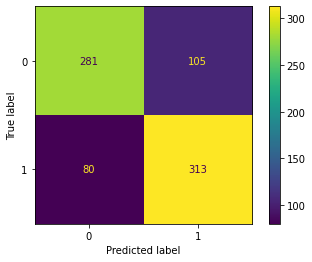

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred2)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [52]:
print(classification_report(y_test,y_pred2,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       386
           1       0.75      0.79      0.77       393

    accuracy                           0.76       779
   macro avg       0.76      0.76      0.76       779
weighted avg       0.76      0.76      0.76       779



In [53]:
feature_names = [X.columns.to_list()]
importances = p2._final_estimator.feature_importances_
std = np.std([p2._final_estimator.feature_importances_ for tree in p2._final_estimator.estimators_], axis=0)

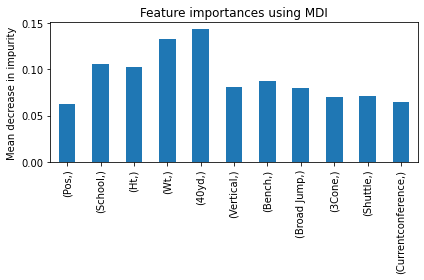

In [66]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


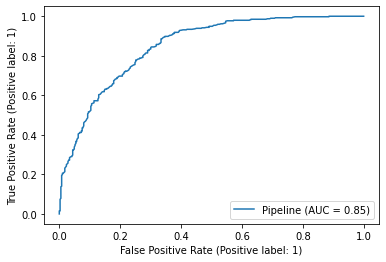

In [67]:
from sklearn import metrics
metrics.plot_roc_curve(p2, X_test, y_test) 

plt.show()

The Variables that were the most important were 
- School
- Weight
- 40 Yd Dash Time

## Now let's compare the latest Combine with our RF

In [145]:
url = f"https://www.pro-football-reference.com/draft/2022-combine.htm"
html = urlopen(url)
combine_data=bs(html)
column_headers = combine_data.findAll('tr')[0]
column_headers = [i.getText() for i in column_headers.findAll(['th','td'])]
rows = combine_data.findAll('tr')[1:]
comb_data=[]
for i in range(len(rows)):
    comb_data.append([col.getText() for col in rows[i].findAll(['td','th'])])
  #print(comb_data)
data = pd.DataFrame(comb_data, columns=column_headers[0:])
df2 = data[(data != data.columns).all(axis=1)]
df2=df2.apply(lambda x:x.str.replace('-','.'))
df2=df2.apply(pd.to_numeric, errors='ignore')
df2['Pos']=df2.Pos.replace(c)
df2=pd.merge(df2.drop('College',axis=1),cfb[['Team','Currentconference']],how='left',left_on='School',right_on='Team')
df2[['Tm','rnd','pc','yr']]=df2['Drafted (tm/rnd/yr)'].str.split('/',expand=True)
players=df2[['Player','Pos']
df2=df2.drop(['Drafted (tm/rnd/yr)','Team','Player','pc'],axis=1)
categ=['Pos','Currentconference','Tm','rnd','School']
df2[categ]=df2[categ].apply(le.fit_transform)
df2['yr']=df2['yr'].replace({np.nan:0})
df2['yr']=df2['yr'].astype(str).astype(int)
df2['Wt']=df2['Wt'].astype(int).astype(float)
df2['drafted']=np.where(df2['yr']!=0,1,0)
df2=df2.replace({np.nan:0})
X2=df2.drop(['Tm','rnd','yr','drafted'],axis=1)
y2=df2['drafted']

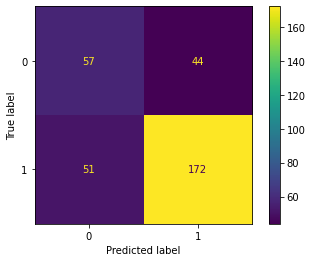

In [141]:
y_pred3=p2.predict(X2)
cm = confusion_matrix(y2, y_pred3)
cm_display = ConfusionMatrixDisplay(cm).plot()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


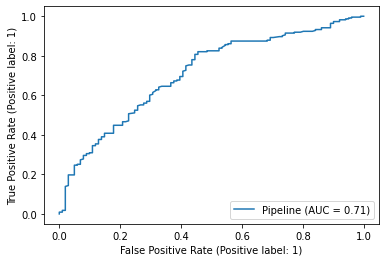

In [137]:
metrics.plot_roc_curve(p2, X2, y2) 
plt.show()

In [142]:
print(classification_report(y2,y_pred3,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55       101
           1       0.80      0.77      0.78       223

    accuracy                           0.71       324
   macro avg       0.66      0.67      0.66       324
weighted avg       0.71      0.71      0.71       324



In [146]:
results=pd.concat([players,pd.Series(y2),pd.Series(y_pred3)],axis=1)
results.to_csv('/Users/gregolas/Documents/python_programming/2023-results.csv',index=False)

# Conclusions
Although there is a good performance from the model there are still things to work on. Here are the takeaways
* We are using merely the Combine to determine if we draft a player or not, further data is required. 
* There are great prospects that don't assist to the combine or they do a Pro Day at their campus. That is why names like Derek Stingley Jr, Drake London, Kenny Pickett that the model opts to not draft. The model may have a selection bias due to variable omission. 
* Hyperparameter tuning would be a nice to have within the Pipeline. The model is compiled merely "as-is" from SciKit Learn.
* We are interested on the players that are marked as drafted but they weren't. We could find a hidden gem on it.
